#### Loading the data

In [16]:
import os
import math
import sys
import numpy as np
import pandas as pd    
import matplotlib.pyplot as plt
import seaborn as sns
# loading all datasets
df_features = pd.read_csv("features_.csv")
df_store = pd.read_csv("stores.csv")
df_train = pd.read_csv("train_.csv")
df_test = pd.read_csv("test_.csv")
df_test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [22]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [24]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [26]:
print(df_features.isnull().sum())

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64


##### Replacing the markdown values with 0, as there is no information in the dataset, we are assuming promotion has not been made in that week

In [28]:
for i in range(1, 6):
    df_features["MarkDown" + str(i)] = df_features["MarkDown" + str(i)].apply(lambda x: 0 if x < 0 else x)
    df_features["MarkDown" + str(i)].fillna(value=0, inplace=True)

In [30]:
df_features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False


In [32]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     8190 non-null   float64
 5   MarkDown2     8190 non-null   float64
 6   MarkDown3     8190 non-null   float64
 7   MarkDown4     8190 non-null   float64
 8   MarkDown5     8190 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


##### Imputing the missing values of CPI and Unemployment using MICE

In [16]:
from sklearn.experimental import enable_iterative_imputer  # To enable IterativeImputer
from sklearn.impute import IterativeImputer
import numpy as np

# Create an imputer object using IterativeImputer
mice_imputer = IterativeImputer(max_iter=10, random_state=0)

# Selecting the columns for MICE imputation (CPI and Unemployment)
cols_to_impute = ['CPI', 'Unemployment']

# Applying MICE to fill the missing values
df_features[cols_to_impute] = mice_imputer.fit_transform(df_features[cols_to_impute])

# Checking if the missing values were successfully imputed
print(df_features[cols_to_impute].isnull().sum())

CPI             0
Unemployment    0
dtype: int64


#### Merging datasets on store and date

In [43]:
# Convert store columns to string to ensure consistency
df_features['Store'] = df_features['Store'].astype(str)
df_train['Store'] = df_train['Store'].astype(str)
df_store['Store'] = df_store['Store'].astype(str)

# Convert date columns to datetime if they are not already
df_features['Date'] = pd.to_datetime(df_features['Date'])
df_train['Date'] = pd.to_datetime(df_train['Date'])

# Strip any leading/trailing spaces in the store columns
df_features['Store'] = df_features['Store'].str.strip()
df_train['Store'] = df_train['Store'].str.strip()
df_store['Store'] = df_store['Store'].str.strip()

In [45]:
# Merge df_features with df_train on 'store' and 'date'
merged_df = pd.merge(df_features, df_train, on=['Store', 'Date'], how='inner')

# Merge the result with df_stores on 'store' only
final_merged_df = pd.merge(merged_df, df_store, on='Store', how='inner')

In [47]:
final_merged_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_x,Dept,Weekly_Sales,IsHoliday_y,Type,Size
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,1,24924.50,False,A,151315
1,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2,50605.27,False,A,151315
2,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,3,13740.12,False,A,151315
3,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,4,39954.04,False,A,151315
4,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,5,32229.38,False,A,151315


In [49]:
#checking whether the column IsHoliday_x and IsHoliday_y are same or not
final_merged_df['IsHoliday_x'].isin(final_merged_df['IsHoliday_y']).all()

True

##### Since the two columns IsHoliday_x, IsHoliday_y are same so drop any one column and make another column as IsHoliday

In [51]:
final_merged_df.drop(columns='IsHoliday_x',inplace=True)
final_merged_df.rename(columns={"IsHoliday_y" : "IsHoliday"}, inplace=True)
final_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  object        
 1   Date          421570 non-null  datetime64[ns]
 2   Temperature   421570 non-null  float64       
 3   Fuel_Price    421570 non-null  float64       
 4   MarkDown1     421570 non-null  float64       
 5   MarkDown2     421570 non-null  float64       
 6   MarkDown3     421570 non-null  float64       
 7   MarkDown4     421570 non-null  float64       
 8   MarkDown5     421570 non-null  float64       
 9   CPI           421570 non-null  float64       
 10  Unemployment  421570 non-null  float64       
 11  Dept          421570 non-null  int64         
 12  Weekly_Sales  421570 non-null  float64       
 13  IsHoliday     421570 non-null  bool          
 14  Type          421570 non-null  object        
 15  Size          421

#### Final Merged DataFrame with all columns

In [53]:
final_merged_df.head()


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Dept,Weekly_Sales,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,24924.50,False,A,151315
1,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2,50605.27,False,A,151315
2,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,13740.12,False,A,151315
3,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,4,39954.04,False,A,151315
4,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,5,32229.38,False,A,151315


## Data Exploration

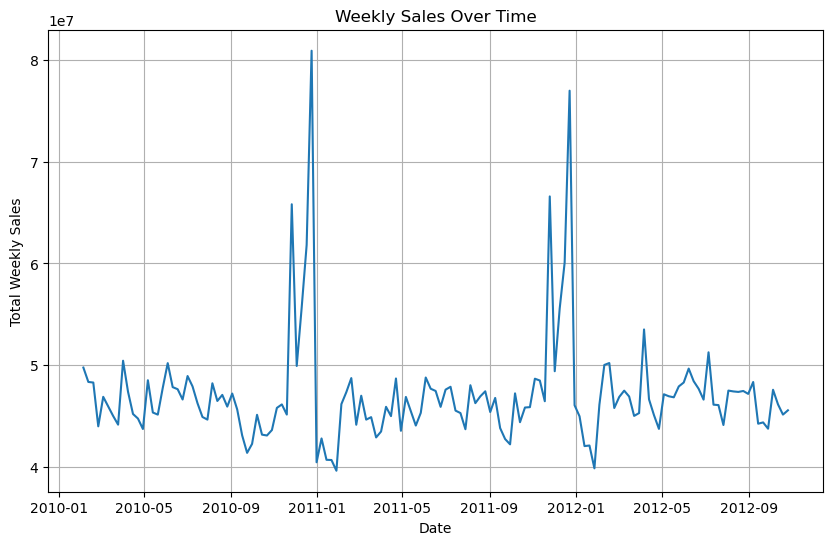

In [145]:
import matplotlib.pyplot as plt

# Convert the 'Date' column to datetime format
final_merged_df['Date'] = pd.to_datetime(final_merged_df['Date'])

# Group by date and sum the weekly sales
sales_over_time = final_merged_df.groupby('Date')['Weekly_Sales'].sum()

# Plot the sales over time
plt.figure(figsize=(10, 6))
plt.plot(sales_over_time.index, sales_over_time.values)
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales')
plt.grid(True)
plt.show()

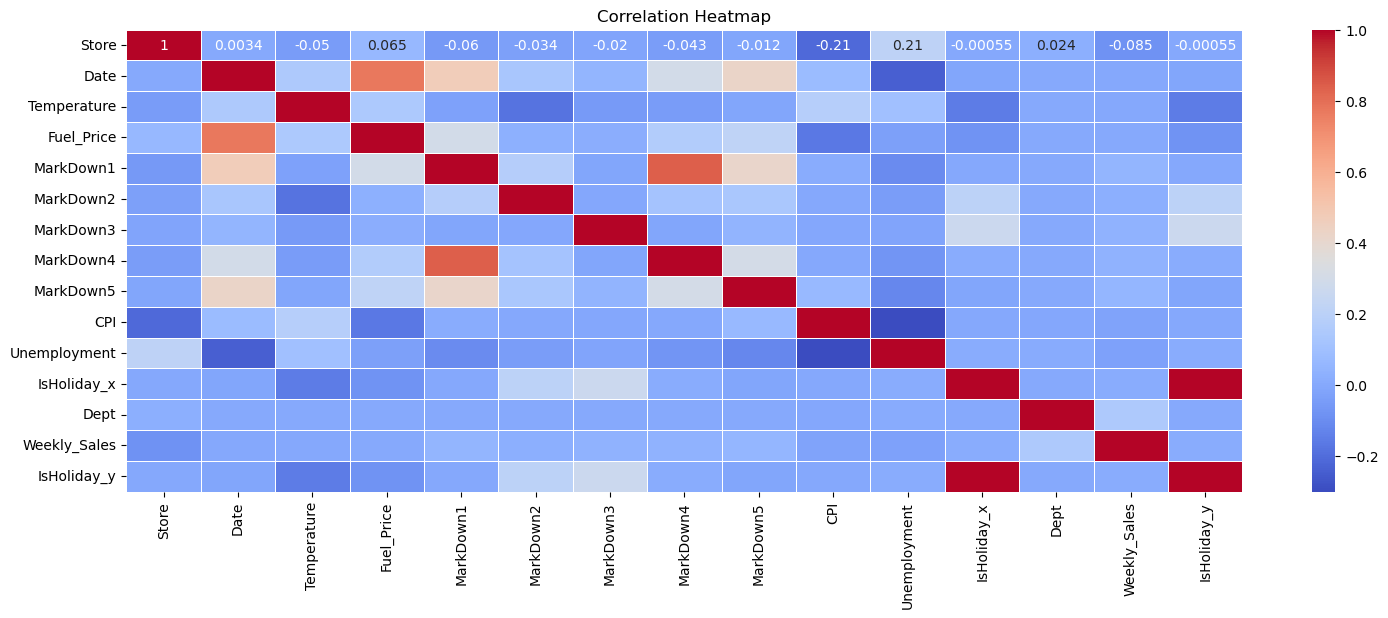

In [147]:
correlation_matrix = merged_df.corr()

# Plot the heatmap
plt.figure(figsize=(18, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

<Axes: xlabel='Store'>

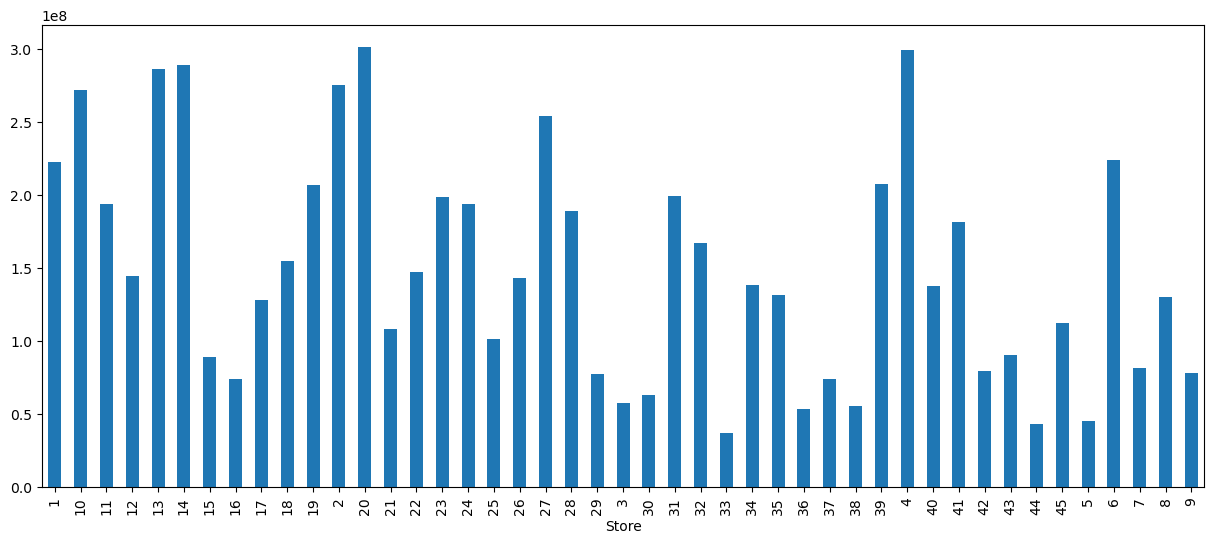

In [122]:
data.groupby('Store')['Weekly_Sales'].sum().plot(kind='bar', figsize=(15, 6))

##### Thus, store '20'and '4' has the highest weekly sales

<Axes: xlabel='Dept'>

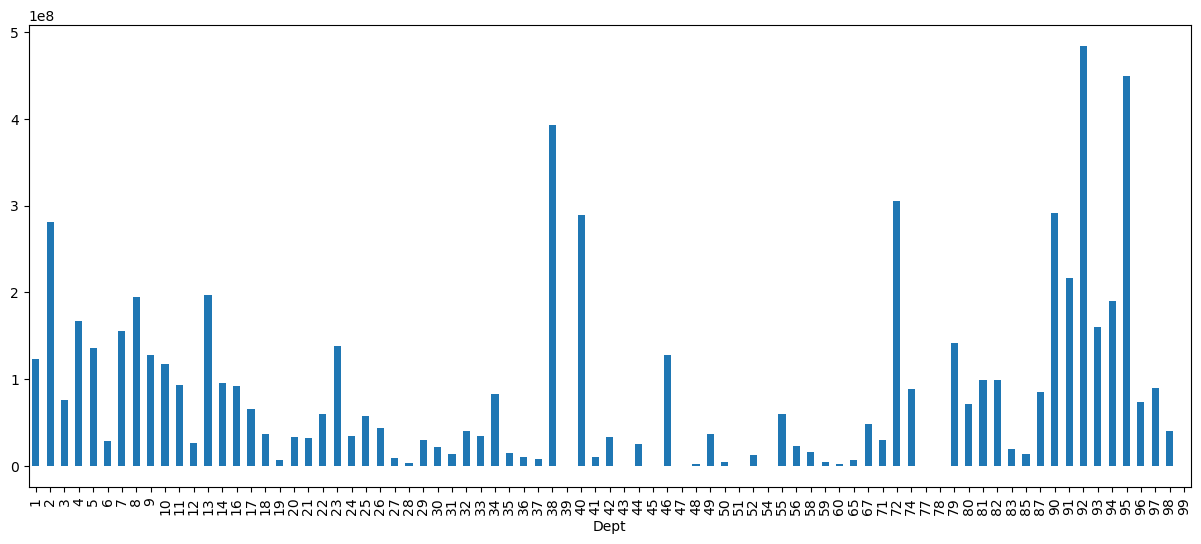

In [127]:
dept_sales=data.groupby('Dept')['Weekly_Sales'].sum()
dept_sales.plot(kind='bar', figsize=(15, 6))

##### Dept number 92 has the highest weekly sales followed by dept number 95 and 38

<Axes: xlabel='Type'>

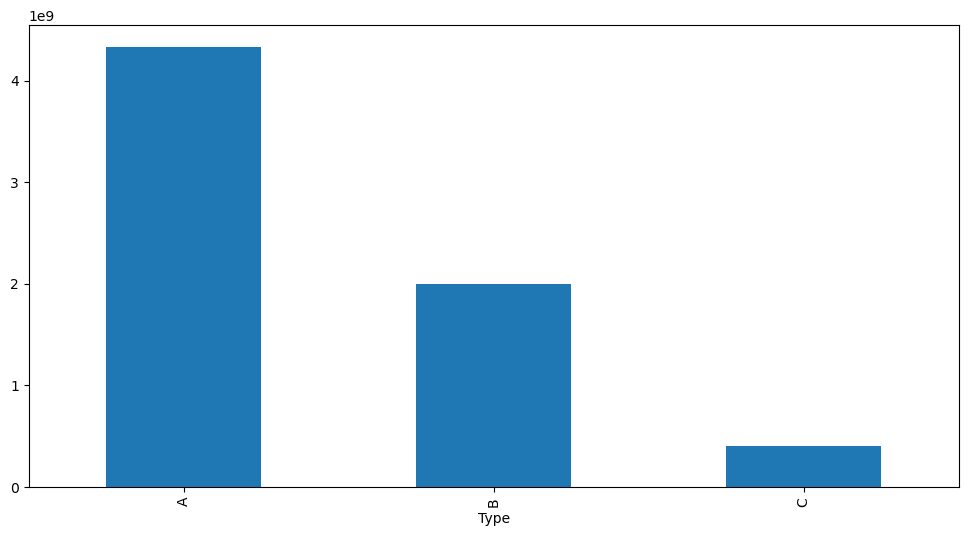

In [131]:
data.groupby('Type')['Weekly_Sales'].sum().plot(kind='bar', figsize=(12, 6))

##### Type A store has the highest weekly sales followed by B and C

<Axes: xlabel='Type,Size'>

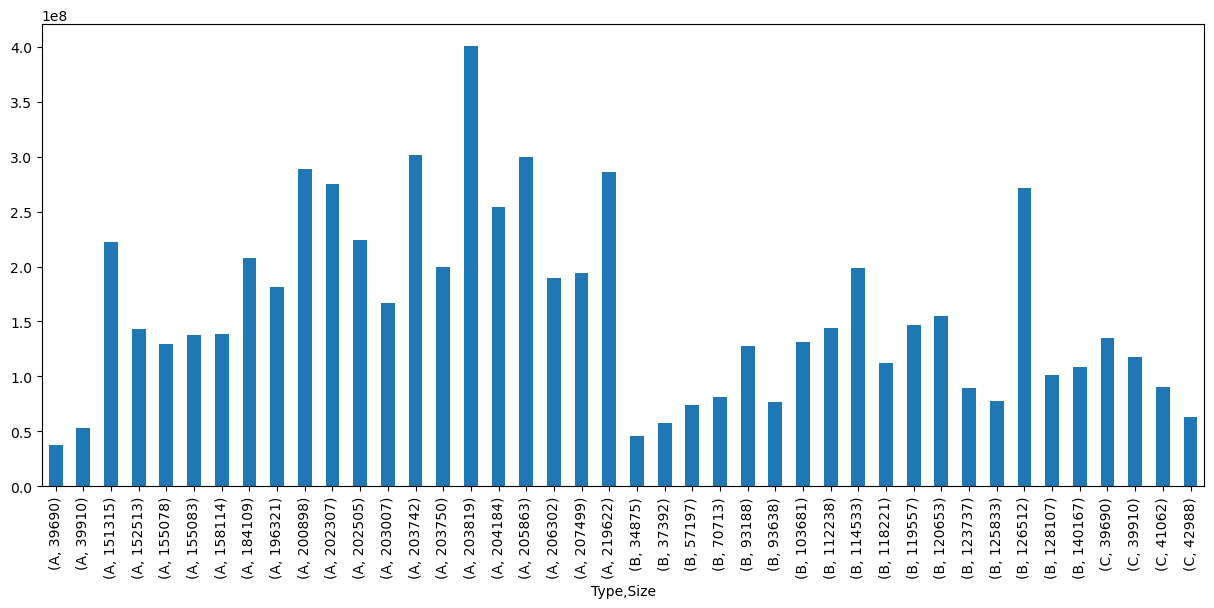

In [134]:
data.groupby(['Type','Size'])['Weekly_Sales'].sum().plot(kind='bar', figsize=(15, 6))

##### Almost half of the stores are bigger than 150000 and categorized as A.

In [137]:
unemp_date=data.groupby('Date')['Unemployment'].mean()
cpi_date = data.groupby('Date')['CPI'].mean()
cpi_date

Date
2010-02-05    167.398405
2010-02-12    167.384138
2010-02-19    167.338966
2010-02-26    167.691019
2010-03-05    167.727351
                 ...    
2012-09-28    175.919639
2012-10-05    175.998254
2012-10-12    176.123786
2012-10-19    176.295499
2012-10-26    176.182886
Name: CPI, Length: 143, dtype: float64

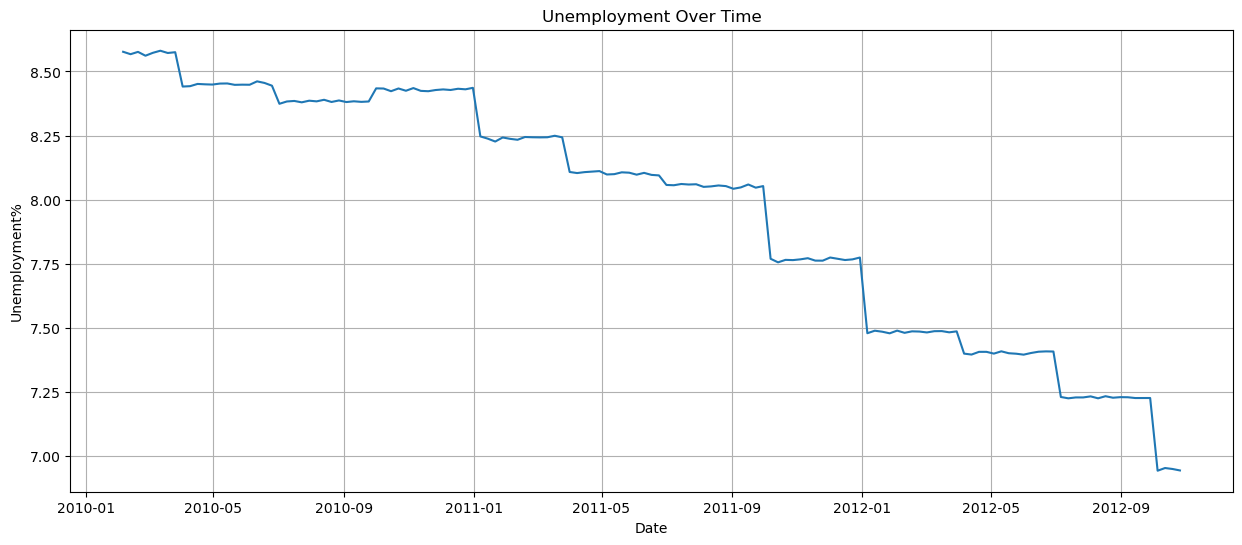

In [139]:
# Plot the unemployment over time
plt.figure(figsize=(15, 6))
plt.plot(unemp_date.index, unemp_date.values)
plt.title('Unemployment Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment%')
plt.grid(True)
plt.show()

##### Although unemployment is on the decline, it has no effect on weekly sales as is evident from the consistant weekly sales

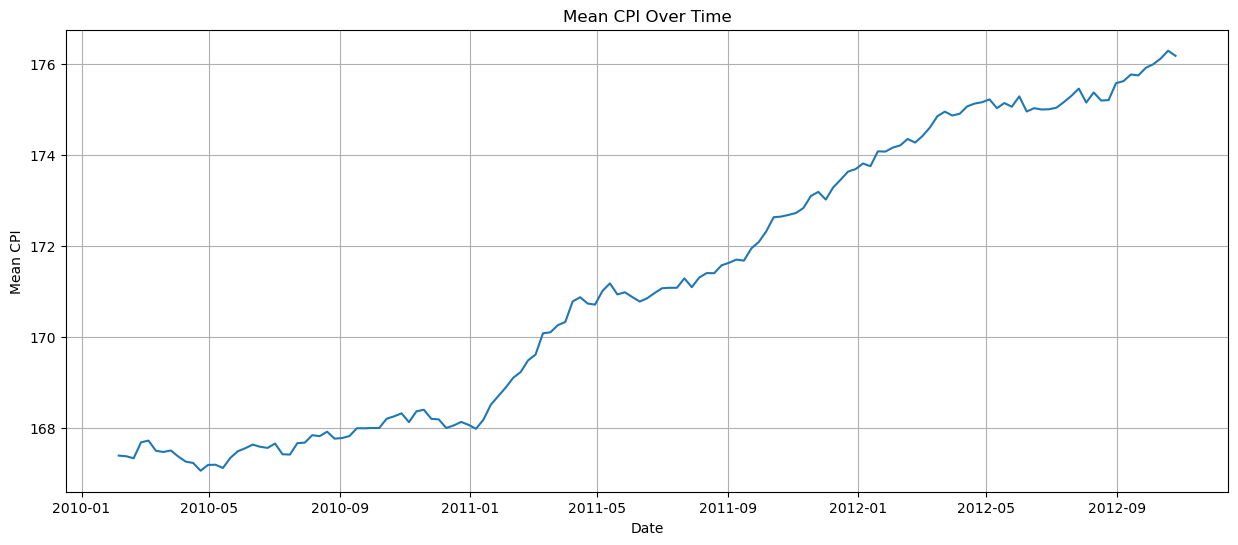

In [142]:
# Plot the CPI over time
plt.figure(figsize=(15, 6))
plt.plot(unemp_date.index, cpi_date.values)
plt.title('Mean CPI Over Time')
plt.xlabel('Date')
plt.ylabel('Mean CPI')
plt.grid(True)
plt.show()

##### Although CPI is on the rise, it has no effect on weekly sales as is evident from the consistant weekly sales

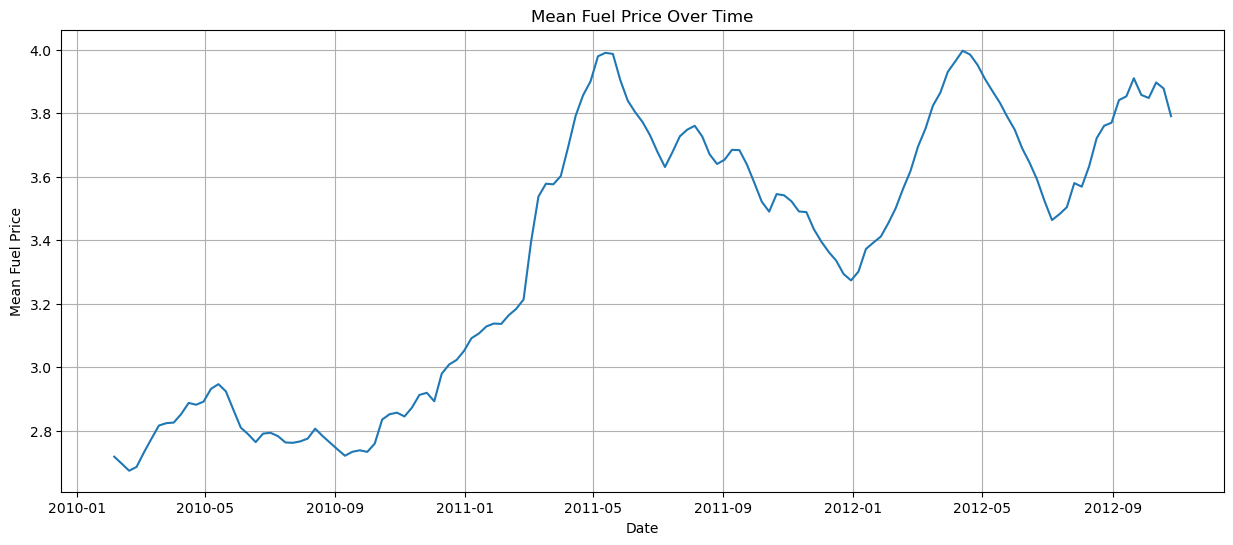

In [152]:
data_fuel=data.groupby('Date')['Fuel_Price'].mean()

# Plot the Fuel Price over time
plt.figure(figsize=(15, 6))
plt.plot(data_fuel.index, data_fuel.values)
plt.title('Mean Fuel Price Over Time')
plt.xlabel('Date')
plt.ylabel('Mean Fuel Price')
plt.grid(True)
plt.show()

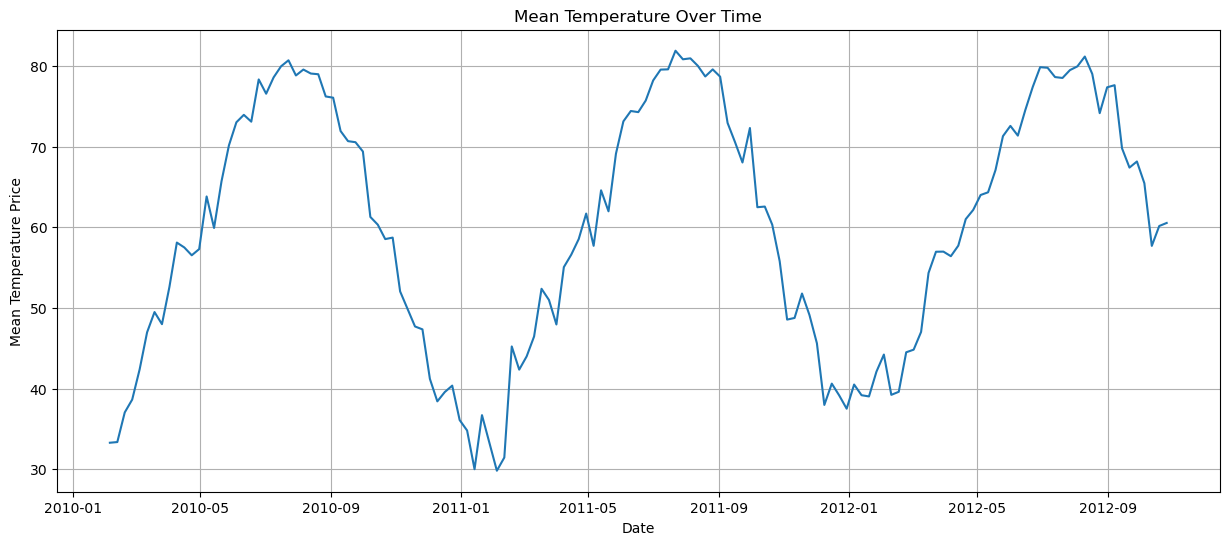

In [154]:
data_temp =data.groupby('Date')['Temperature'].mean()

# Plot the Temp over time
plt.figure(figsize=(15, 6))
plt.plot(data_temp.index, data_temp.values)
plt.title('Mean Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Mean Temperature Price')
plt.grid(True)
plt.show()

<Axes: ylabel='IsHoliday'>

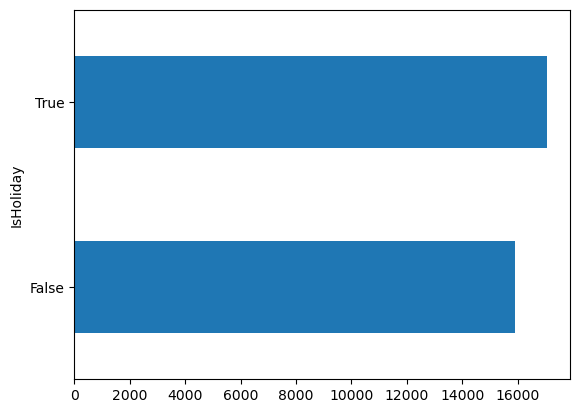

In [156]:
data.groupby('IsHoliday')['Weekly_Sales'].mean().plot(kind='barh')

#####  Holiday average sales are higher than normal dates.

In [170]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Week'] = data['Date'].dt.isocalendar().week
data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Dept,Weekly_Sales,IsHoliday,Type,Size,Year,Month,Week
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,24924.50,False,A,151315,2010,2,5
1,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2,50605.27,False,A,151315,2010,2,5
2,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,13740.12,False,A,151315,2010,2,5
3,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,4,39954.04,False,A,151315,2010,2,5
4,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,5,32229.38,False,A,151315,2010,2,5


<Axes: ylabel='Month'>

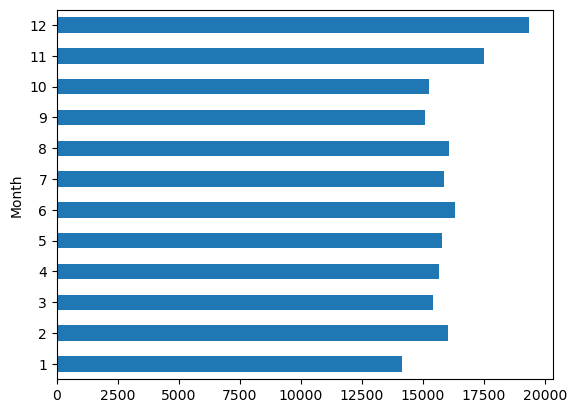

In [172]:
data.groupby('Month')['Weekly_Sales'].mean().plot(kind='barh')

##### Sales is highest in December followed by November month. Least sales occur in January owing to the purchases done in Dec and Nov

<Axes: xlabel='Week'>

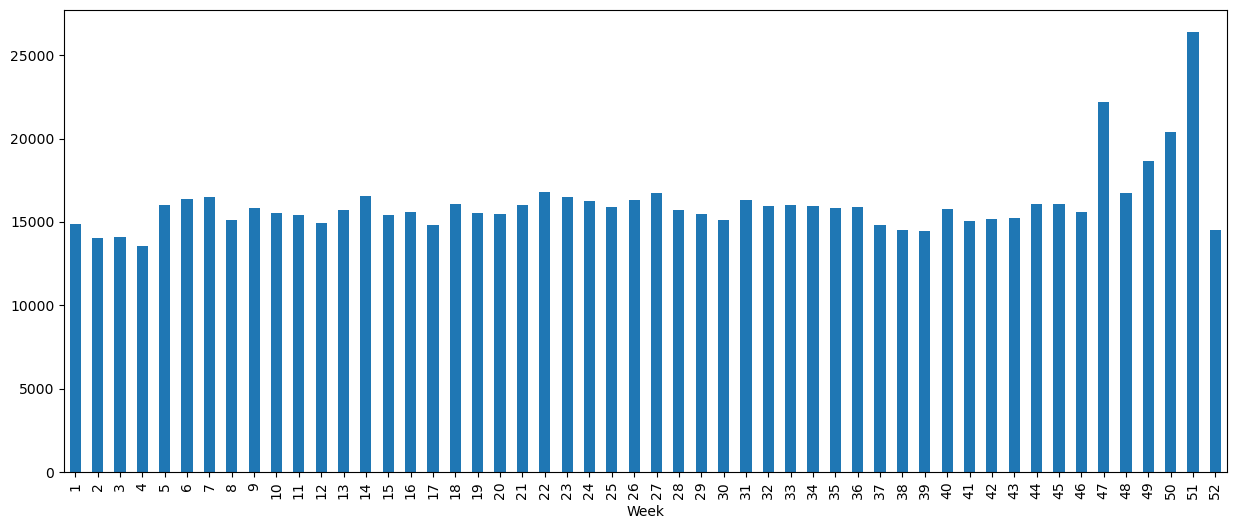

In [174]:
data.groupby('Week')['Weekly_Sales'].mean().plot(kind='bar', figsize=(15, 6))

##### Sales is highest for the events of Christmas (Week 51) followed by Black Friday (Week 47)

## Modelling

#### Linear Regression

In [149]:
model1_data= final_merged_df


In [101]:
# Convert 'Type' column into dummy variables
model1_data = pd.get_dummies(model1_data, columns=['Type'], drop_first=True)

# Convert 'IsHoliday' from boolean to numeric (True = 1, False = 0)
model1_data['IsHoliday'] = model1_data['IsHoliday'].astype(int)

model1_data['Type_B'] = model1_data['Type_B'].astype(int)
model1_data['Type_C'] = model1_data['Type_C'].astype(int)


# Check the result
print(model1_data.head())

  Store       Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
0     1 2010-02-05        42.31       2.572        0.0        0.0        0.0   
1     1 2010-02-05        42.31       2.572        0.0        0.0        0.0   
2     1 2010-02-05        42.31       2.572        0.0        0.0        0.0   
3     1 2010-02-05        42.31       2.572        0.0        0.0        0.0   
4     1 2010-02-05        42.31       2.572        0.0        0.0        0.0   

   MarkDown4  MarkDown5         CPI  Unemployment  Dept  Weekly_Sales  \
0        0.0        0.0  211.096358         8.106     1      24924.50   
1        0.0        0.0  211.096358         8.106     2      50605.27   
2        0.0        0.0  211.096358         8.106     3      13740.12   
3        0.0        0.0  211.096358         8.106     4      39954.04   
4        0.0        0.0  211.096358         8.106     5      32229.38   

   IsHoliday    Size  Type_B  Type_C  
0          0  151315       0       0  
1 

In [103]:
import pandas as pd
import statsmodels.api as sm

# Drop unnecessary columns and create features and target
X = model1_data.drop(columns=['Weekly_Sales', 'Store', 'Dept', 'Date'])

# Add a constant to the model (intercept term)
X = sm.add_constant(X)
# Convert all columns to numeric, coercing errors to NaN
# X = X.apply(pd.to_numeric, errors='coerce')

# Target variable
y = model1_data['Weekly_Sales']

# Fit the OLS model
ols_model = sm.OLS(y, X).fit()

# Print the OLS summary
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     2201.
Date:                Thu, 26 Sep 2024   Prob (F-statistic):               0.00
Time:                        15:21:28   Log-Likelihood:            -4.8129e+06
No. Observations:              421570   AIC:                         9.626e+06
Df Residuals:                  421556   BIC:                         9.626e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         8358.8915    437.015     19.127   

##### The model explains only a small fraction (6.4%) of the total variability in the dependent variable based on the independent variables included in the model.
##### This means that 93.6% of the variability in weekly sales is not explained by the model, suggesting that there are other important factors or variables influencing sales that are not captured by the current model.

### Lasso

In [107]:
model1_data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Dept,Weekly_Sales,IsHoliday,Size,Type_B,Type_C
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,24924.50,0,151315,0,0
1,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2,50605.27,0,151315,0,0
2,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,13740.12,0,151315,0,0
3,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,4,39954.04,0,151315,0,0
4,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,5,32229.38,0,151315,0,0


In [111]:
# Extract month and year from the 'Date' column
model1_data['Year'] = model1_data['Date'].dt.year
model1_data['Month'] = model1_data['Date'].dt.month

# Create dummy variables for 'Year' and 'Month'
# month_dummies = pd.get_dummies(model1_data['Month'], prefix='Month')

# Concatenate the dummy variables with the original DataFrame
#model1_data = pd.concat([model1_data, month_dummies], axis=1)

# Drop the original 'Year' and 'Month' columns if you no longer need them
# model1_data.drop(columns=['Month'], inplace=True)

# Display the updated DataFrame
model1_data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Dept,Weekly_Sales,IsHoliday,Size,Type_B,Type_C,Year,Month
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,24924.50,0,151315,0,0,2010,2
1,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2,50605.27,0,151315,0,0,2010,2
2,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,13740.12,0,151315,0,0,2010,2
3,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,4,39954.04,0,151315,0,0,2010,2
4,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,5,32229.38,0,151315,0,0,2010,2


In [113]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assume 'model1_data' is your DataFrame
# Drop unnecessary columns
X = model1_data.drop(columns=['Weekly_Sales', 'Store', 'Dept', 'Date'])

# Convert categorical columns into dummy variables
# X = pd.get_dummies(X, drop_first=True)

# Target variable
y = model1_data['Weekly_Sales']

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features to have mean=0 and variance=1
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply Lasso regression with cross-validation to select the best alpha
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = lasso.predict(X_test_scaled)

# Evaluate the model performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Best alpha for Lasso: {lasso.alpha_}")
print(f"Test RMSE: {rmse}")
print(f"Test R²: {r2}")
# Show coefficients of Lasso
coefficients = pd.Series(lasso.coef_, index=X.columns)
print("Lasso Coefficients:")
print(coefficients)


Best alpha for Lasso: 5.501891433347153
Test RMSE: 22183.574870416825
Test R²: 0.06518183945739053
Lasso Coefficients:
Temperature      322.720681
Fuel_Price       229.347445
MarkDown1        388.819336
MarkDown2         77.288068
MarkDown3        618.144436
MarkDown4         -0.000000
MarkDown5        286.117806
CPI             -586.207046
Unemployment    -660.445891
IsHoliday         46.365446
Size            6012.270844
Type_B            81.383390
Type_C          1229.177401
Year            -779.383889
Month            309.947843
dtype: float64


##### Results are similar to Linear, providing very little predictive power over sales

### Arima

In [115]:
data= final_merged_df


In [117]:
data['Date'] = pd.to_datetime(data['Date'])

# Aggregate the data by week
weekly_sales = data.groupby('Date')['Weekly_Sales'].sum().reset_index()

# Set the date as the index
weekly_sales.set_index('Date', inplace=True)

In [34]:
# Define the training period
train = weekly_sales.iloc[:-52]  # Use all but the last year for training
test = weekly_sales.iloc[-52:]  # Use the last year for testing

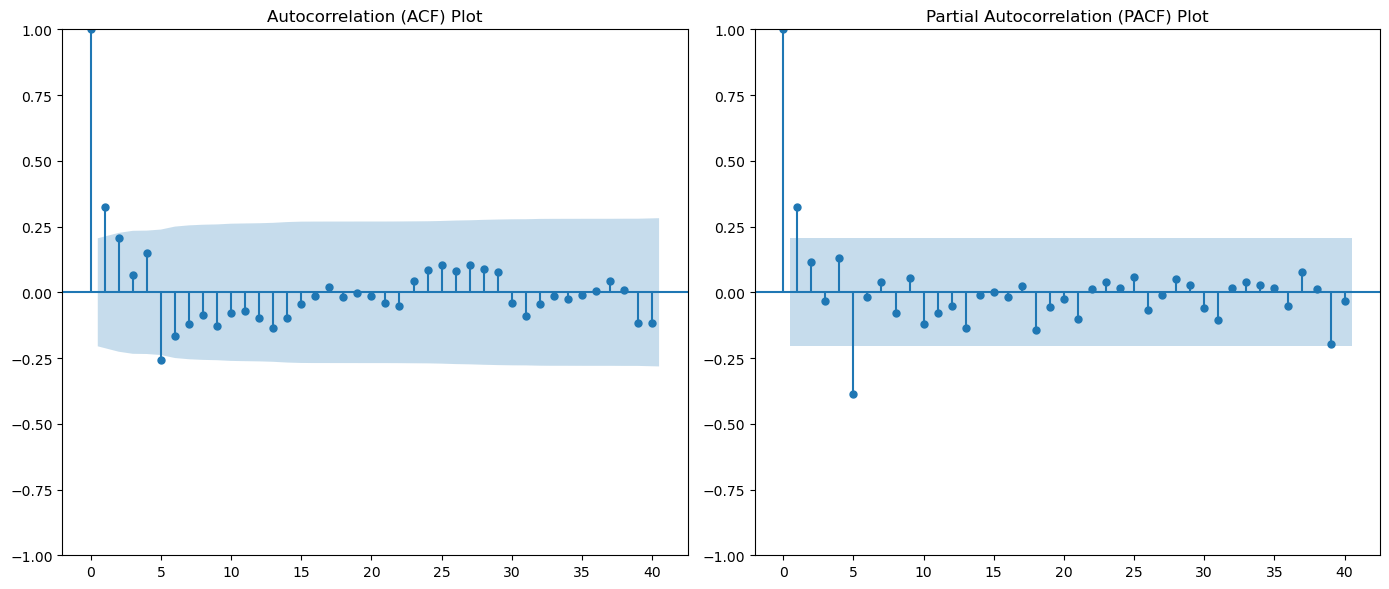

In [195]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming 'train' is your DataFrame and contains a 'Weekly_Sales' column
plt.figure(figsize=(14, 6))

# ACF plot (Autocorrelation Function)
plt.subplot(1, 2, 1)
plot_acf(train['Weekly_Sales'], lags=40, ax=plt.gca())
plt.title('Autocorrelation (ACF) Plot')

# PACF plot (Partial Autocorrelation Function)
plt.subplot(1, 2, 2)
plot_pacf(train['Weekly_Sales'], lags=40, ax=plt.gca())
plt.title('Partial Autocorrelation (PACF) Plot')

plt.tight_layout()
plt.show()

A strong spike at lag 1 indicates that there is a strong autocorrelation at the first lag, meaning that the value at time t is highly correlated with the value at time t-1
The significant spike at lag 1 in the PACF plot indicates that an autoregressive (AR) component is present.

This points to a potential ARIMA(1, d, 1) model, where d is determined by the stationarity of the time series (i.e., whether differencing is required).

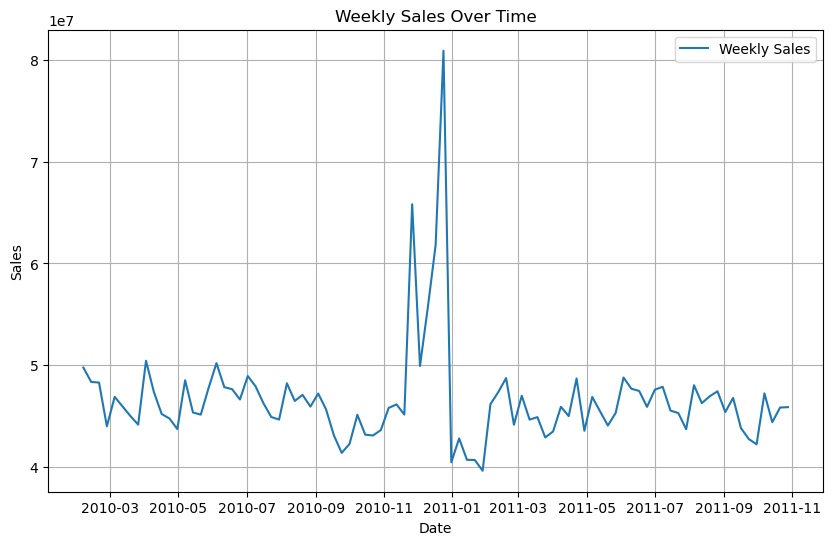

In [197]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Ensure the Date column is in datetime format and set as the index
# train['Date'] = pd.to_datetime(train['Date'])
# train.set_index('Date', inplace=True)

# Define the target variable (y)
y = train['Weekly_Sales']

# Plot the original time series
plt.figure(figsize=(10, 6))
plt.plot(y, label='Weekly Sales')
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.legend()
plt.show()




In [199]:
# Perform Augmented Dickey-Fuller test (ADF Test)
adf_test = adfuller(y.dropna())
print('ADF Statistic:', adf_test[0])
print('p-value:', adf_test[1])
for key, value in adf_test[4].items():
    print(f'Critical Value {key}: {value}')

if adf_test[1] < 0.05:
    print("The series is stationary (reject H0)")
else:
    print("The series is non​n-stationary (fail to reject H0)")

ADF Statistic: -4.758862328286021
p-value: 6.514676331765507e-05
Critical Value 1%: -3.5087828609430614
Critical Value 5%: -2.895783561573195
Critical Value 10%: -2.5850381719848565
The series is stationary (reject H0)


##### p-value is less than 0.05, so we reject the null hypothesis and confirm stationarity

In [203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Ensure the Date column is in datetime format and set as the index
#train['Date'] = pd.to_datetime(train['Date'])
# train.set_index('Date', inplace=True)

# Define the target variable (y) - in this case, 'Weekly_Sales'
y = train['Weekly_Sales']

# Manually set ARIMA parameters
p, d, q = 1, 0, 1  # You can adjust these values based on ACF/PACF plots or differencing

# Fit the ARIMA model using SARIMAX
model = SARIMAX(y, order=(p, d, q), seasonal_order=(0, 0, 0, 0), enforce_stationarity=False, enforce_invertibility=False)
results = model.fit()

# Print the summary of the fitted model
print(results.summary())



RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.65277D+01    |proj g|=  9.84351D-02

At iterate    5    f=  1.65205D+01    |proj g|=  6.81526D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6     11      1     0     0   5.264D-05   1.652D+01
  F =   16.520471194271128     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observati

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


In [205]:
# Inspect the index of the dataset to find valid dates
print(test.index.min(), train.index.max())  # This will give you the min and max dates in your dat

2011-11-04 00:00:00 2011-10-28 00:00:00


RMSE: 7251673.183535284


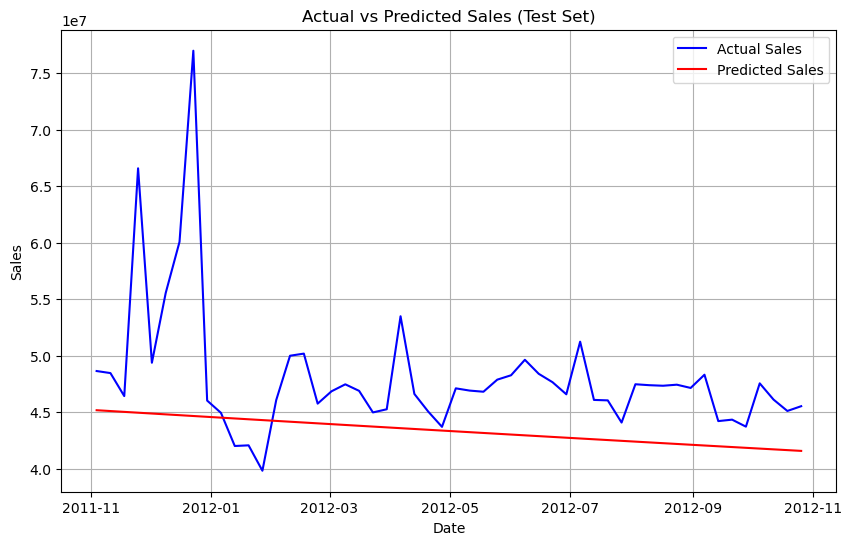

In [207]:
# Get the number of steps for prediction (the length of the test set)
forecast_steps = len(test)  # 52 weeks (or however long your test set is)

# Make predictions (out-of-sample forecast) using the test set length
forecast = results.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean

# Calculate RMSE based on the test set
rmse = np.sqrt(mean_squared_error(test['Weekly_Sales'], forecast_mean))
print(f"RMSE: {rmse}")

# Plot actual vs predicted values (test set)
plt.figure(figsize=(10, 6))
plt.plot(test['Weekly_Sales'], label='Actual Sales', color='blue')
plt.plot(forecast_mean, label='Predicted Sales', color='red')
plt.title('Actual vs Predicted Sales (Test Set)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

### Auto-Arima

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
!pip install pmdarima
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Automatic ARIMA Modeling
# To begin, we use an automated algorithm to find a good model.
# However, there is no guarantee that it is the best model. So we treat it as a starting point.
model_auto = auto_arima(train['Weekly_Sales'], start_p=0, start_q=0,
                        test='adf',       # use adftest to find optimal 'd'
                        max_p=6, max_q=6, # maximum p and q
                        m=1,              # frequency of series
                        d=None,           # let model determine 'd'
                        seasonal=False,   # No Seasonality
                        start_P=0,
                        D=0,
                        trace=True,
                        error_action='ignore',
                        suppress_warnings=True,
                        stepwise=False)

print(model_auto.summary())

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3436.570, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=3379.533, Time=0.01 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=3364.102, Time=0.01 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=3363.254, Time=0.01 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=3362.145, Time=0.03 sec
 ARIMA(0,0,5)(0,0,0)[0]             : AIC=3363.380, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=3051.230, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=3049.592, Time=0.06 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=3050.094, Time=0.03 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=3051.107, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=3053.884, Time=0.02 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=3044.831, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0]  

In [211]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming your model_auto is the fitted model from auto_arima
n_periods = len(test)  # Number of steps to forecast (same as the length of your test set)

# Make predictions for the test period
predictions = model_auto.predict(n_periods=n_periods)

# predictions now contains the forecasted values for the test period
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)

print(f"RMSE for best ARIMA model: {rmse}")

RMSE for best ARIMA model: 6024389.32133487


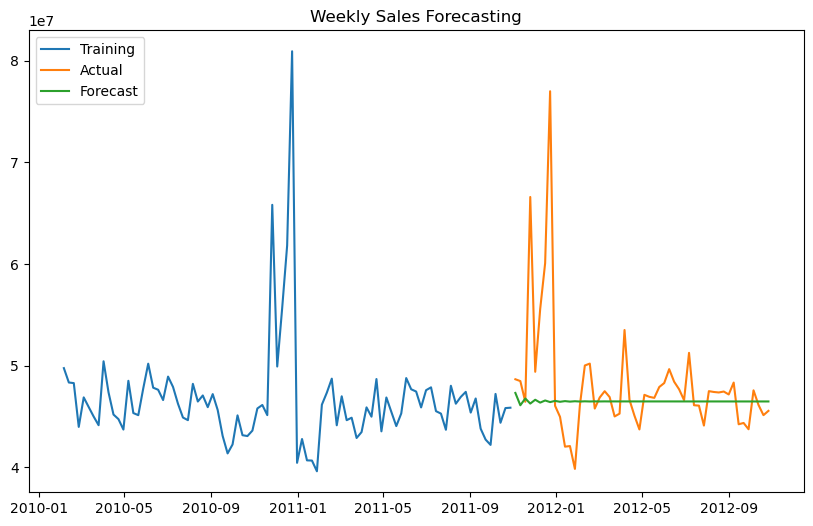

In [215]:
import matplotlib.pyplot as plt


# Plot the forecast against the actual values
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Training')
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, predictions, label='Forecast')
plt.legend(loc='upper left')
plt.title('Weekly Sales Forecasting')
plt.show()

##### Even ARIMA model is not able to predict the sales effectively but there is a clear seasonal pattern here, we can try SARIMA

In [44]:
import pmdarima as pm
import pandas as pd
import matplotlib.pyplot as plt


# Define the target variable (assuming Box-Cox transformed data)
y = train['Weekly_Sales']

# Automatic SARIMA modeling using auto_arima
model_auto = pm.auto_arima(
    y,                         # Target variable (Box-Cox transformed series)
    seasonal=True,              # Seasonal component enabled
    m=52,                       # Seasonality (weekly data, 52 weeks in a year)
    start_p=0, max_p=6,         # Range for AR terms
    start_q=0, max_q=6,         # Range for MA terms
    d=None,                     # Let auto_arima decide the differencing term
    start_P=0, max_P=6,         # Range for seasonal AR terms
    start_Q=0, max_Q=6,         # Range for seasonal MA terms
    D=None,                     # Let auto_arima decide the seasonal differencing term
    trace=True,                 # Print the progress
    error_action='ignore',      # Ignore errors
    suppress_warnings=True,     # Suppress warnings
    stepwise=True,              # Perform stepwise search to find the best model
    information_criterion='aic' # Criterion to select the best model (AIC)
)

# Print the summary of the model
print(model_auto.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[52] intercept   : AIC=3074.045, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[52] intercept   : AIC=3067.479, Time=0.88 sec
 ARIMA(0,0,1)(0,0,1)[52] intercept   : AIC=3066.901, Time=0.81 sec
 ARIMA(0,0,0)(0,0,0)[52]             : AIC=3474.860, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[52] intercept   : AIC=3068.965, Time=0.01 sec
 ARIMA(0,0,1)(1,0,1)[52] intercept   : AIC=3068.716, Time=0.54 sec
 ARIMA(0,0,1)(0,0,2)[52] intercept   : AIC=3067.056, Time=2.14 sec
 ARIMA(0,0,1)(1,0,0)[52] intercept   : AIC=3070.914, Time=0.75 sec
 ARIMA(0,0,1)(1,0,2)[52] intercept   : AIC=3068.874, Time=4.81 sec
 ARIMA(0,0,0)(0,0,1)[52] intercept   : AIC=3070.231, Time=0.17 sec
 ARIMA(1,0,1)(0,0,1)[52] intercept   : AIC=3064.488, Time=0.87 sec
 ARIMA(1,0,1)(0,0,0)[52] intercept   : AIC=3067.550, Time=0.01 sec
 ARIMA(1,0,1)(1,0,1)[52] intercept   : AIC=3065.457, Time=1.22 sec
 ARIMA(1,0,1)(0,0,2)[52] intercept   : AIC=3064.219, Time=3.44 sec
 ARIMA(1,0,1)(1,0,2

In [47]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming your model_auto is the fitted model from auto_arima
n_periods = len(test)  # Number of steps to forecast (same as the length of your test set)

# Make predictions for the test period
predictions = model_auto.predict(n_periods=n_periods)

# predictions now contains the forecasted values for the test period
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)

print(f"RMSE for best ARIMA model: {rmse}")

RMSE for best ARIMA model: 2909290.993112882


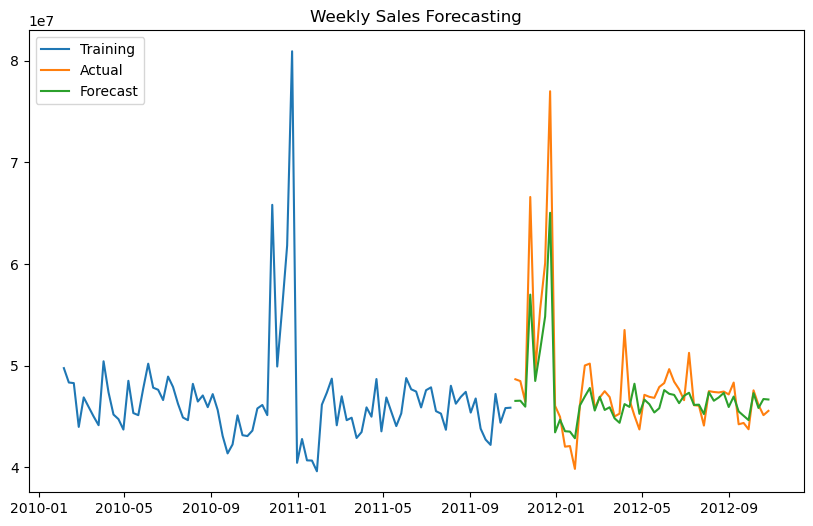

In [56]:
import matplotlib.pyplot as plt


# Plot the forecast against the actual values
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Training')
plt.plot(test.index, test, label='Actual')
plt.plot(predictions.index, predictions, label='Forecast')
plt.legend(loc='upper left')
plt.title('Weekly Sales Forecasting')
plt.show()

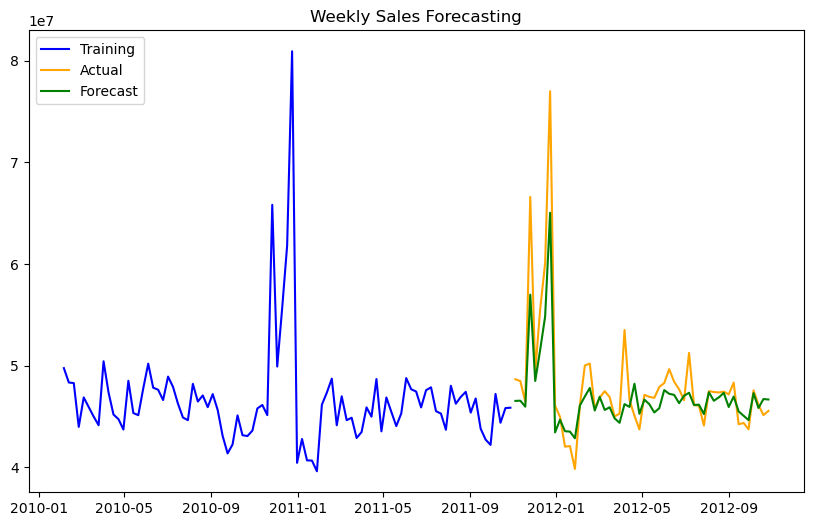

In [236]:
import matplotlib.pyplot as plt

# Plot the forecast against the actual values with custom colors
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Training', color='blue')       # Training line in blue
plt.plot(test.index, test, label='Actual', color='orange')         # Actual line in orange
plt.plot(test.index, predictions, label='Forecast', color='green') # Forecast line in green
plt.legend(loc='upper left')
plt.title('Weekly Sales Forecasting')

# Save the chart as a PNG file
plt.savefig('weekly_sales_forecasting.jpeg')  # You can change the file format and path as needed

plt.show()